<a href="https://colab.research.google.com/github/EmanoelSantosDados/TratamentoDadosPython/blob/main/TratamentoDadosPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
# Importando as bibliotecas

#Pandas: Possui inúmeras funções e comandos para importar arquivos, análisar dados, tratar dados e mais.
import pandas as pd

#Numpy: Funções e comandos para computação científica(formatação, cálculos e mais).
import numpy as np

#Matplotlib: Funções e comandos para exibição de gráficos.
import matplotlib.pyplot as plt

#Seaborn: Funções e comandos para exibição de gráficos(Mais robusto que o Matplotlib).
import seaborn as sns

#Warnings: Funções e comandos para ignorar avisos que aparecem, como atualizações e métodos depreciados.
import warnings
warnings.filterwarnings('ignore')

#Locale: Funções e comandos para formatação de números, datas, valores, dias de acordo com a região que queremos.
import locale

In [167]:
#Exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [168]:
#Carregando e armazenando o arquivo como DataFrame
df = pd.read_excel('/content/dados.xlsx')

In [169]:
#Verificando a quantidade de linhas e colunas
df.shape

(986, 10)

In [170]:
#Verificando as linhas iniciais
df.head(7)

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
5,10/1/2020,MERCEDES SL80,4.5,8,1700,360,480,AUTOMATICO,800000,IMPORTADO
6,10/1/2020,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL


In [171]:
##Verificando as linhas finais
df.tail(7)

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
979,10/12/2021,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO
980,10/12/2021,MERCEDES SL80,4.5,8,1700,360,480,AUTOMATICO,800000,IMPORTADO
981,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL
982,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000,NACIONAL
983,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000,NACIONAL
984,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000,NACIONAL
985,10/12/2021,PASSAT,8.0,6,1800,200,118,MANUAL,200000,IMPORTADO


In [172]:
#Avaliando o período dos dados coletados
inicio = pd.to_datetime(df['DATA_VENDA']).dt.date.min()          #Variável inicio recebe a data mínima da coluna DATA_VENDA
fim = pd.to_datetime(df['DATA_VENDA']).dt.date.max()             #Variável fim recebe a data máxima da coluna DATA_VENDA
print('Período dos dados: De {} até {}'.format(inicio, fim))     #Exibe o período dos dados

Período dos dados: De 2020-10-01 até 2021-10-12


In [173]:
#Informações sobre os dados
df.info()
print('Variável DATA_VENDA deve ser do tipo Date e VALOR do tipo float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    object 
 9   CATEGORIA                986 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 77.2+ KB
Variável DATA_VENDA deve ser do tipo Date e VALOR do tipo float


In [174]:
#Verificando se há valores discrepantes
print('Há valores discrepantes, SEM VALOR')
df.groupby(['VALOR']).size()

Há valores discrepantes, SEM VALOR


,0
VALOR,
18000,48
28000,42
30000,24
35000,42
40000,30
42000,66
48000,66
60000,66
85000,36


Poderiamos resolver de duas formas:

Primeira: Excluir todo registro, porém perderiamos dados.
df.drop(df.loc[df['VALOR'] == 'SEM VALOR'].index, inplace=True)

Segunda: Verificar o valor médio ou a mediana e substituir a palavra SEM VALOR por um valor médio.

Vamos utilizar a segunda.

In [175]:
#Verificando o modelo que está sem valor, PASSAT
df.loc[df['VALOR'] == 'SEM VALOR']

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
45,10/3/2020,PASSAT,8.0,6,1800,200,118,MANUAL,SEM VALOR,IMPORTADO


In [176]:
#Substituindo SEM VALOR por zero
df.loc[(df['VALOR'] == 'SEM VALOR'), 'VALOR'] = 0

In [177]:
#Convertendo o campo em float
df['VALOR'] = df['VALOR'].astype(np.float64)

In [178]:
#Verificando os valores medianos do PASSAT
df.loc[df['MODELO'] == 'PASSAT'].VALOR.median()

200000.0

In [179]:
#Atualizando o valor conforme a mediana
#df.loc[(df['MODELO'] == 'PASSAT') & (df['VALOR'] == 0), 'VALOR'] = 20000
df.loc[(df['VALOR'] == 200000), 'VALOR'] = 0

In [180]:
df.groupby(['VALOR']).size()

,0
VALOR,
0.0,66
18000.0,48
28000.0,42
30000.0,24
35000.0,42
40000.0,30
42000.0,66
48000.0,66
60000.0,66


In [181]:
#Verificando se alguma variável possui nulos(missing)
df.isnull().sum()

,0
DATA_VENDA,0
MODELO,0
KM-LITRO,2
CILINDROS,0
PESO(KG),0
VELOCIDADE_MAXIMA(KM/H),0
CAVALOS,0
TRANSMISSAO,0
VALOR,0
CATEGORIA,0


In [182]:
#Tratando os nulos(missing) / Preencher os valor em branco com a mediana
df['KM-LITRO'] = df['KM-LITRO'].fillna((df['KM-LITRO'].median()))

In [183]:
#Avaliando novamente os tipos das veriáveis
df.info()

#Falta tratar a data da venda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 986 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    float64
 9   CATEGORIA                986 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 77.2+ KB


Avaliando os outliers das colunas numéricas

In [184]:
#Variáveis do tipo INT64 e FLOAT64
var_numericas = []
for i in df.columns[0:48].tolist():
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    print(i, ':' , df.dtypes[i])
    var_numericas.append(i)

KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : float64


In [185]:
print('Seis linhs, seis gráficos')
var_numericas

Seis linhs, seis gráficos


['KM-LITRO',
 'CILINDROS',
 'PESO(KG)',
 'VELOCIDADE_MAXIMA(KM/H)',
 'CAVALOS',
 'VALOR']

## **Exibindo vários gráficos simultaneamente**

**Boxplots** --> É utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, e para procurar outliers. Por padrão, um boxplot mostra a mediana, os quartis, o intervalo interquartis(IQR) e outliers para cada variável.

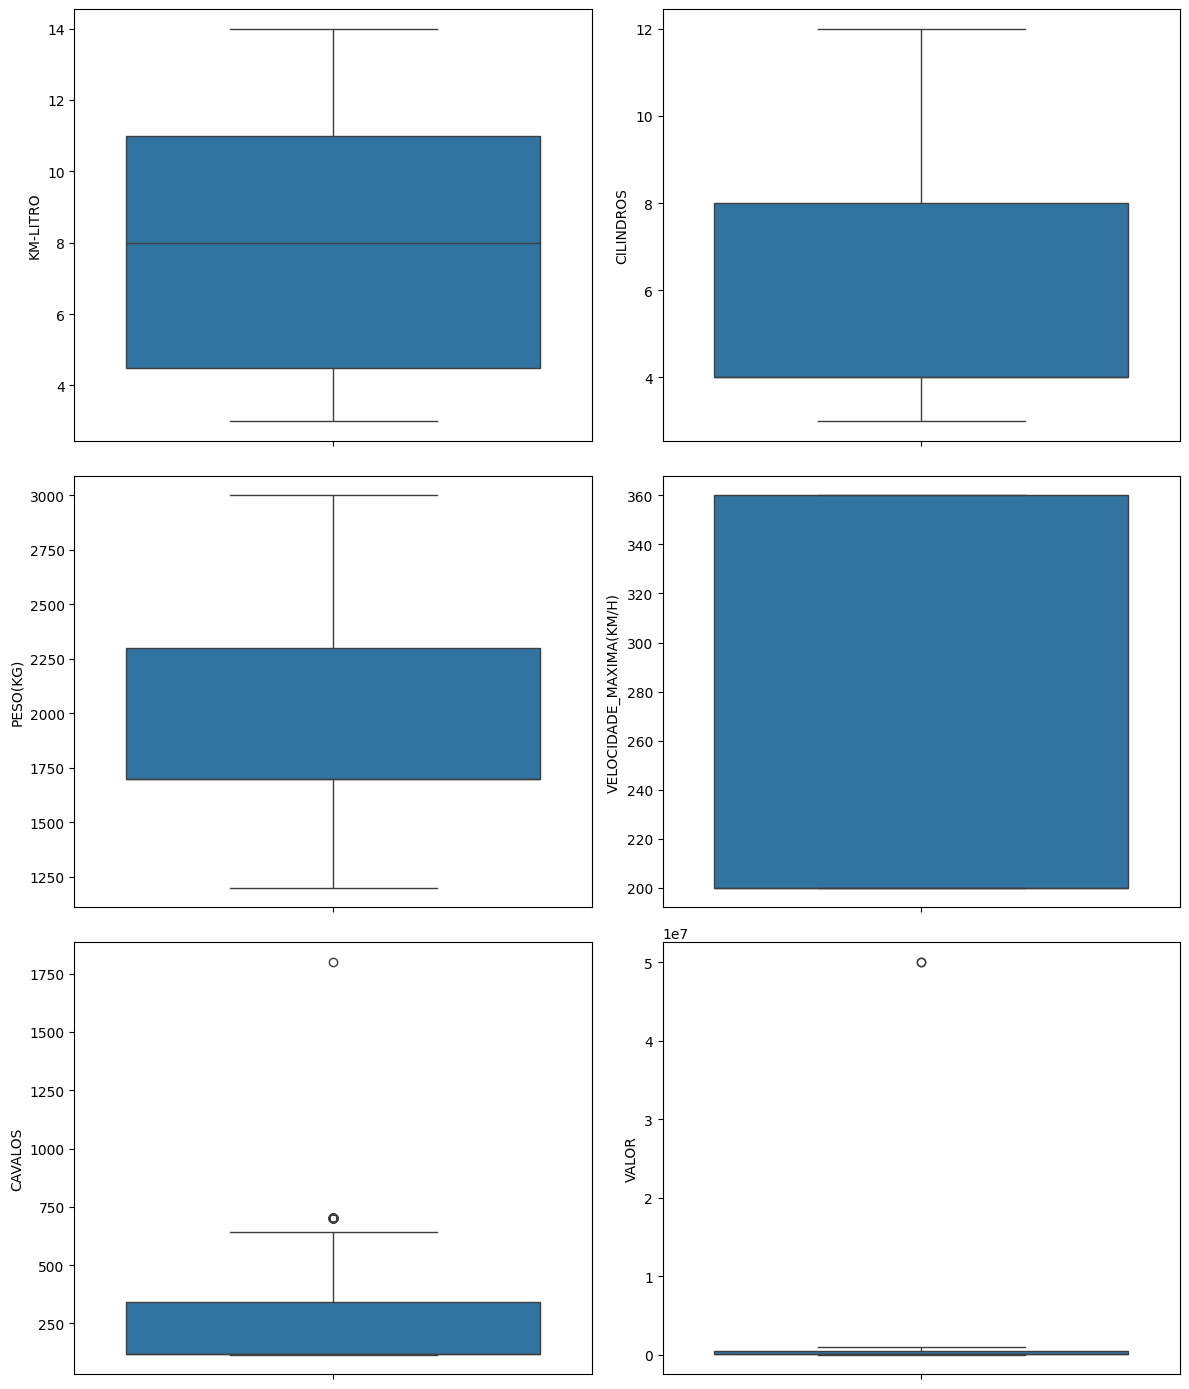

In [186]:
#Definindo o tamanho da tela
plt.rcParams['figure.figsize'] = [12.00, 14.00]
plt.rcParams['figure.autolayout'] = True

#Quantidade de linhas e colunas para exibir os gráficos
f, axes = plt.subplots(3, 2)  #3 Linhas e 2 colunas

linha = 0
coluna = 0

for i in var_numericas:
  sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

**Temos outliers nas variáveis CAVALO e VALOR.**

Vamos listar CAVALOS acima de 700 e a variável VALOR valos listar acima de 900MIL.

In [187]:
#Cavalos
df.loc[df['CAVALOS'] > 700]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
11,10/1/2020,CORSA,9.0,4,1900,200,1800,MANUAL,35000.0,NACIONAL


In [188]:
#Cavalos acima de 1800
df.drop(df.loc[df['CAVALOS'] == 1800].index, inplace=True) #Excluindo, corsa não tem 1800 cavalos, erro de digitação

In [189]:
#Valor
df.loc[df['VALOR'] > 900000]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO


In [190]:
#Valor mediano do Lamborguini
df.loc[df['MODELO'] == 'LABORGUINI'].VALOR.median()  #Valor está discrepante, vcamos utilizar uma media

900000.0

In [191]:
#Valor
df.loc[(df['VALOR'] > 900000), 'VALOR'] = 900000

**Avaliando novamente o boxplot**

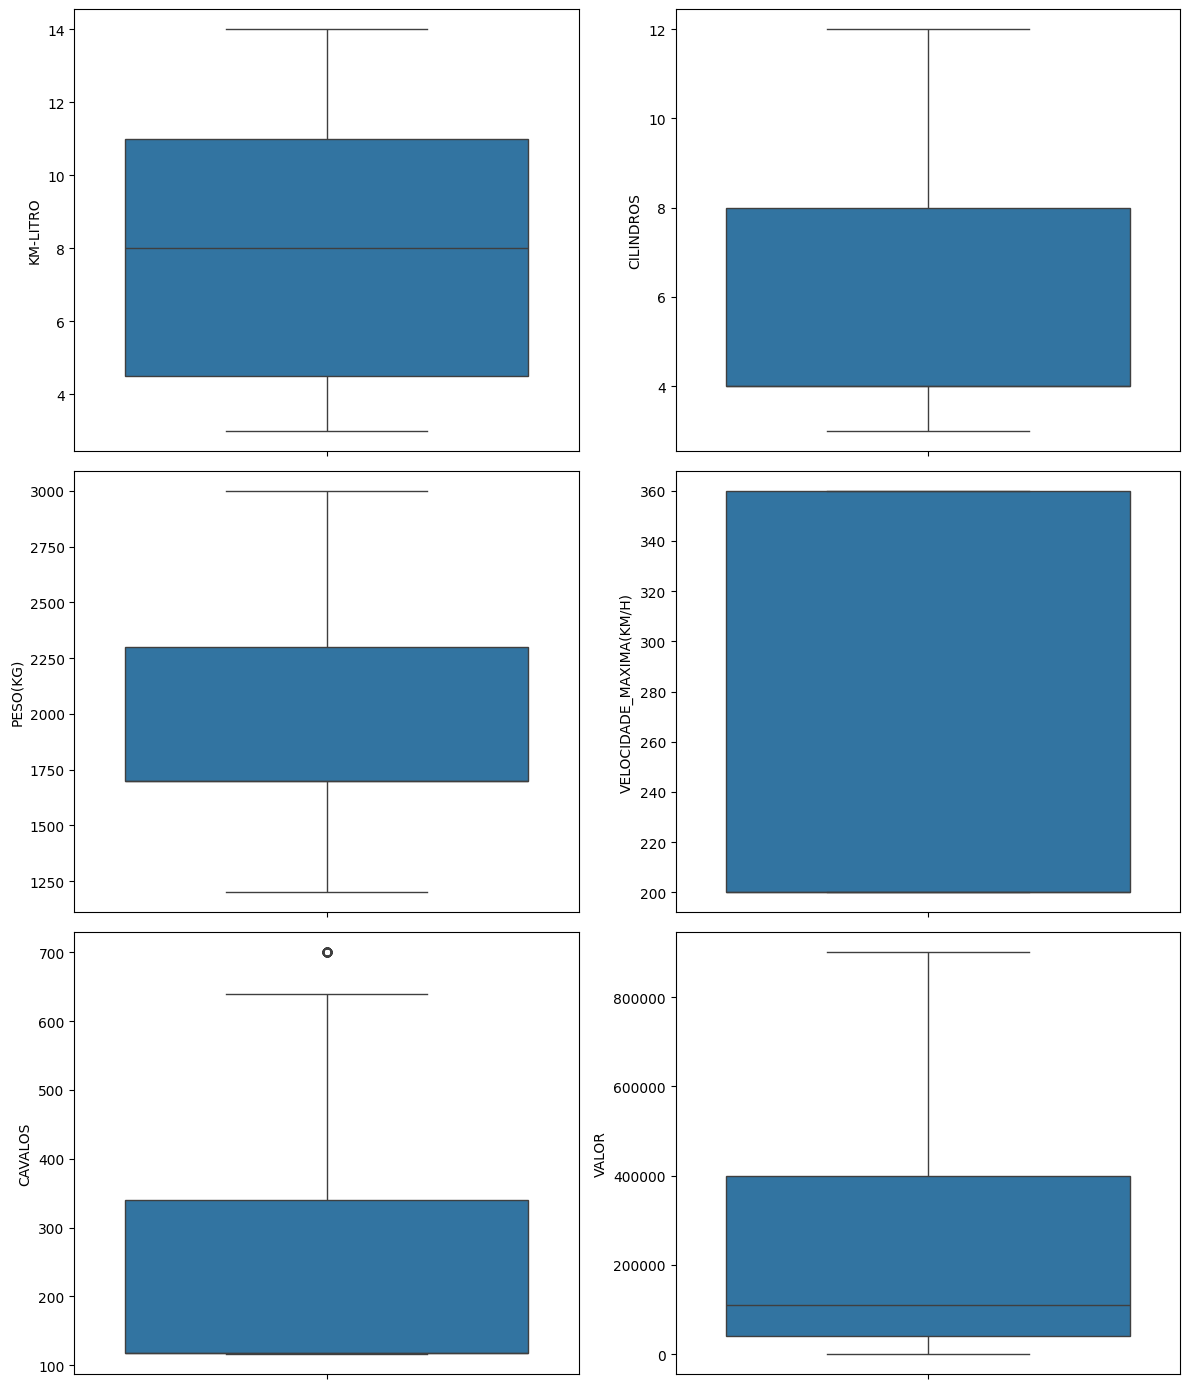

In [192]:
#Definindo o tamanho da tela
plt.rcParams['figure.figsize'] = [12.00, 14.00]
plt.rcParams['figure.autolayout'] = True

#Quantidade de linhas e colunas para exibir os gráficos
f, axes = plt.subplots(3, 2)  #3 Linhas e 2 colunas

linha = 0
coluna = 0

for i in var_numericas:
  sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
  coluna += 1
  if coluna == 2:
    linha += 1
    coluna = 0

plt.show()

**Ainda tem poucos outliers, porém analisando os carros, vemos que é a potência dele mesmo. Vamos manter.**

# **Engenharia de atributos**

**Variável DATA_VENDA**

In [193]:
#Vamos utilizar a data padrão Brasil
df['DATA_VENDA'] = pd.to_datetime(df['DATA_VENDA'], format='%d/%m/%Y')    #Convertendo para datetime dia/mês/ano
df['DATA_VENDA'] = df['DATA_VENDA'].dt.date                               #Extraindo só a data
df['ANO_VENDA'] = pd.DatetimeIndex(df['DATA_VENDA']).year                 #Criando a variável ANO_VENDA / Extraindo o ano
df['MES_VENDA'] = pd.DatetimeIndex(df['DATA_VENDA']).month                #Criando a variável MES_VENDA / Extraindo o mês
df['DIA_VENDA'] = pd.DatetimeIndex(df['DATA_VENDA']).day                  #Criando a variável DIA_VENDA / Extraindo o dia
df['DIA_SEMANA_VENDA'] = pd.DatetimeIndex(df['DATA_VENDA']).day_name(locale='')  #Criando a variável DIA_SEMANA_VENDA

In [194]:
#Transformando dia da semana para português
df.loc[df['DIA_SEMANA_VENDA'] == 'Monday', 'DIA_SEMANA_VENDA'] = 'Segunda-feira'
df.loc[df['DIA_SEMANA_VENDA'] == 'Tuesday', 'DIA_SEMANA_VENDA'] = 'Terça-feira'
df.loc[df['DIA_SEMANA_VENDA'] == 'Wednesday', 'DIA_SEMANA_VENDA'] = 'Quarta-feira'
df.loc[df['DIA_SEMANA_VENDA'] == 'Thursday', 'DIA_SEMANA_VENDA'] = 'Quinta-feira'
df.loc[df['DIA_SEMANA_VENDA'] == 'Friday', 'DIA_SEMANA_VENDA'] = 'Sexta-feira'
df.loc[df['DIA_SEMANA_VENDA'] == 'Saturday', 'DIA_SEMANA_VENDA'] = 'Sábado'
df.loc[df['DIA_SEMANA_VENDA'] == 'Sunday', 'DIA_SEMANA_VENDA'] = 'Domingo'

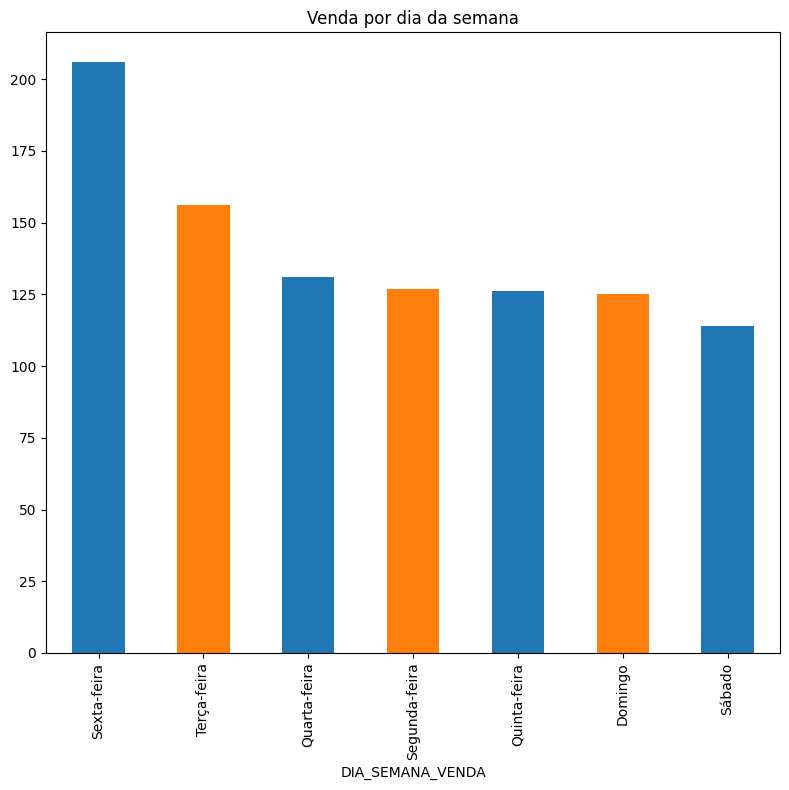

In [195]:
#Vendas por dia
plt.rcParams['figure.figsize'] = [8.00, 8.00]
plt.rcParams['figure.autolayout'] = True
df.DIA_SEMANA_VENDA.value_counts().plot(kind='bar', title='Venda por dia da semana', color=['#1F77B4', '#FF7F0E']);

In [196]:
#Substituindo números pelo nome do mês
df.loc[df['MES_VENDA'] == 1, 'MES_VENDA'] = 'Janeiro'
df.loc[df['MES_VENDA'] == 2, 'MES_VENDA'] = 'Fevereiro'
df.loc[df['MES_VENDA'] == 3, 'MES_VENDA'] = 'Março'
df.loc[df['MES_VENDA'] == 4, 'MES_VENDA'] = 'Abril'
df.loc[df['MES_VENDA'] == 5, 'MES_VENDA'] = 'Maio'
df.loc[df['MES_VENDA'] == 6, 'MES_VENDA'] = 'Junho'
df.loc[df['MES_VENDA'] == 7, 'MES_VENDA'] = 'Julho'
df.loc[df['MES_VENDA'] == 8, 'MES_VENDA'] = 'Agosto'
df.loc[df['MES_VENDA'] == 9, 'MES_VENDA'] = 'Setembro'
df.loc[df['MES_VENDA'] == 10, 'MES_VENDA'] = 'Outubro'
df.loc[df['MES_VENDA'] == 11, 'MES_VENDA'] = 'Novembro'
df.loc[df['MES_VENDA'] == 12, 'MES_VENDA'] = 'Dezembro'

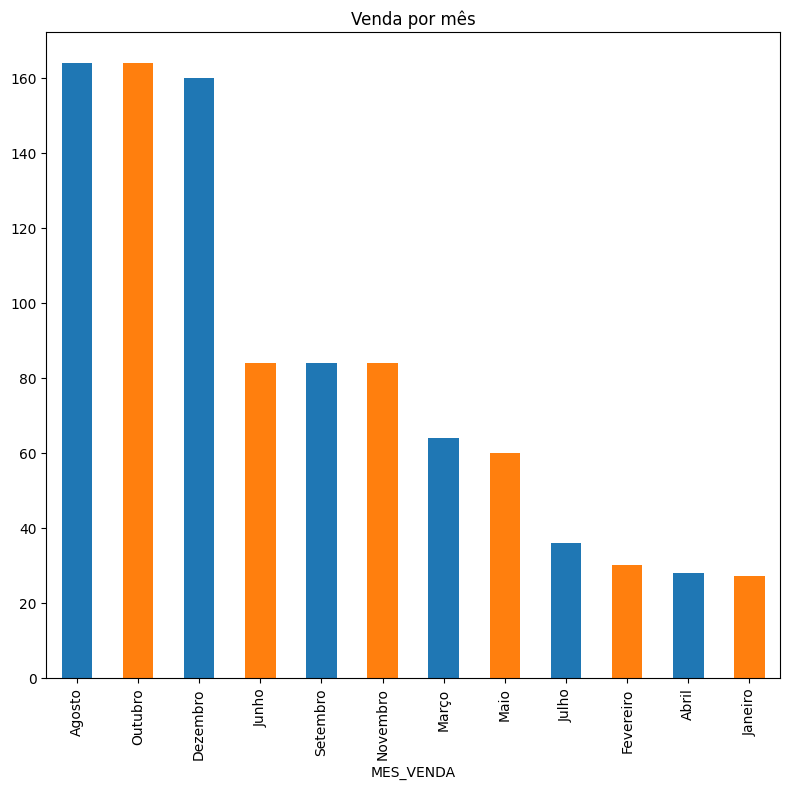

In [197]:
#Vendas por mês
plt.rcParams['figure.figsize'] = [8.00, 8.00]
plt.rcParams['figure.autolayout'] = True
df.MES_VENDA.value_counts().plot(kind='bar', title='Venda por mês', color=['#1F77B4', '#FF7F0E']);

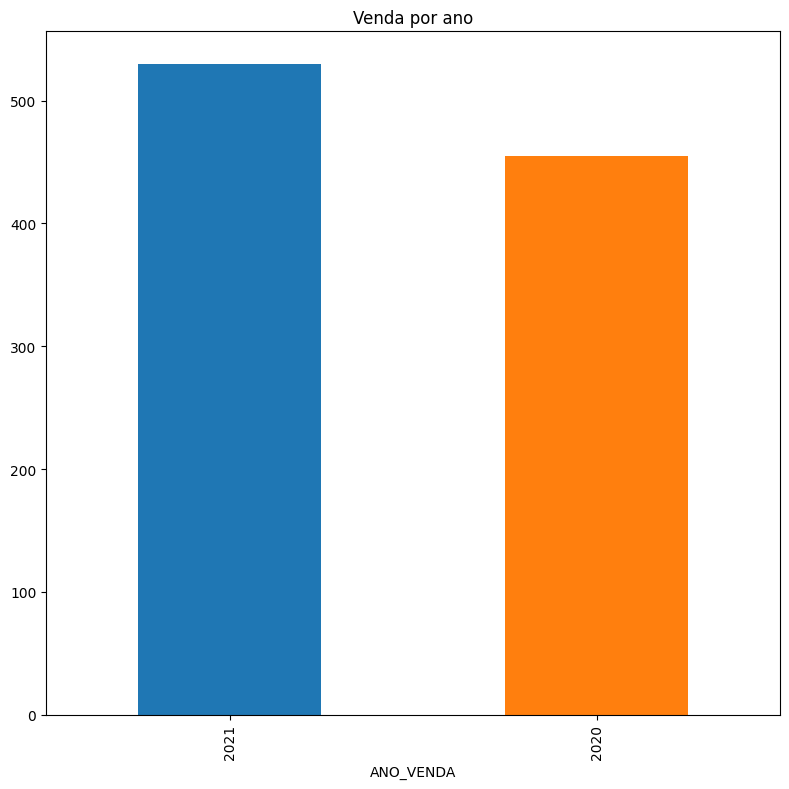

In [198]:
#Vendas por ano
df.ANO_VENDA.value_counts().plot(kind='bar', title='Venda por ano', color=['#1F77B4', '#FF7F0E']);

# **Variáveis Dummies ou One Hot Encoding**

Tratamentos de dados para Machine Learning ou IA.

Deixando todos os dados como números.

In [199]:
#Vamos excluir as variáveis que não precisamos mais
df.drop('DATA_VENDA', axis=1, inplace=True)

In [200]:
#Transformando os campos categóricos para One Hot Encoding
df = pd.get_dummies(df)

In [201]:
df.head()

,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,VALOR,ANO_VENDA,DIA_VENDA,MODELO_ASTON MARTIN,MODELO_BMW X1,MODELO_BMW X5,MODELO_COROLLA,MODELO_CORSA,MODELO_CRETA,MODELO_FERRARI,MODELO_GOL,MODELO_HB20,MODELO_HONDA FIT,MODELO_JEEP COMPASS,MODELO_JEEP RENEGADE,MODELO_LABORGUINI,MODELO_MERCEDES SL80,MODELO_MOBI,MODELO_PAJERO,MODELO_PALIO,MODELO_PARATI,MODELO_PASSAT,MODELO_SAVEIRO,MODELO_UNO,MODELO_VECTRA,TRANSMISSAO_AUTOMATICO,TRANSMISSAO_MANUAL,CATEGORIA_IMPORTADO,CATEGORIA_NACIONAL,MES_VENDA_Abril,MES_VENDA_Agosto,MES_VENDA_Dezembro,MES_VENDA_Fevereiro,MES_VENDA_Janeiro,MES_VENDA_Julho,MES_VENDA_Junho,MES_VENDA_Maio,MES_VENDA_Março,MES_VENDA_Novembro,MES_VENDA_Outubro,MES_VENDA_Setembro,DIA_SEMANA_VENDA_Domingo,DIA_SEMANA_VENDA_Quarta-feira,DIA_SEMANA_VENDA_Quinta-feira,DIA_SEMANA_VENDA_Segunda-feira,DIA_SEMANA_VENDA_Sexta-feira,DIA_SEMANA_VENDA_Sábado,DIA_SEMANA_VENDA_Terça-feira
0,3.0,12,1200,360,700,900000.0,2020,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,3.0,12,1200,360,700,900000.0,2020,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3.0,12,1200,360,700,900000.0,2020,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,3.0,12,1400,360,640,900000.0,2020,10,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,3.5,10,1600,360,620,900000.0,2020,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [202]:
#Salvando o arquivo tratado
df.to_excel('dados_tratados.xlsx', index=False)